In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data Science/PTDataScience/Other/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df = df.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Visibility','Item_Outlet_Sales']]
df.head()

,Item_Weight,Item_MRP,Item_Visibility,Item_Outlet_Sales
0,9.30,249.8092,0.016047,3735.1380
1,5.92,48.2692,0.019278,443.4228
2,17.50,141.6180,0.016760,2097.2700
3,19.20,182.0950,0.000000,732.3800
4,8.93,53.8614,0.000000,994.7052


In [ ]:
df.shape

(8523, 4)

In [ ]:
df.isna().sum()

Item_Weight          1463
Item_MRP                0
Item_Visibility         0
Item_Outlet_Sales       0
dtype: int64

In [ ]:
df = df.dropna(how = 'any')
df.isna().sum()

Item_Weight          0
Item_MRP             0
Item_Visibility      0
Item_Outlet_Sales    0
dtype: int64

In [ ]:
df.corr().sort_values(by = ['Item_Outlet_Sales'])

,Item_Weight,Item_MRP,Item_Visibility,Item_Outlet_Sales
Item_Visibility,-0.014048,-0.006061,1.000000,-0.085334
Item_Weight,1.000000,0.027141,-0.014048,0.014123
Item_MRP,0.027141,1.000000,-0.006061,0.620961
Item_Outlet_Sales,0.014123,0.620961,-0.085334,1.000000


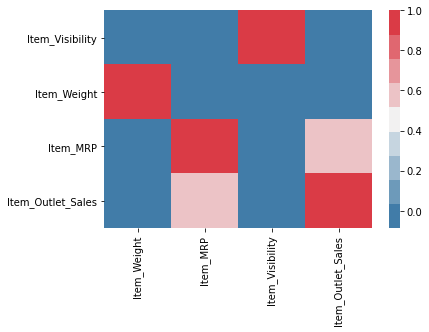

In [ ]:
sns.heatmap(df.corr().sort_values(by = ['Item_Outlet_Sales']), cmap = sns.diverging_palette(240, 10, n=9))

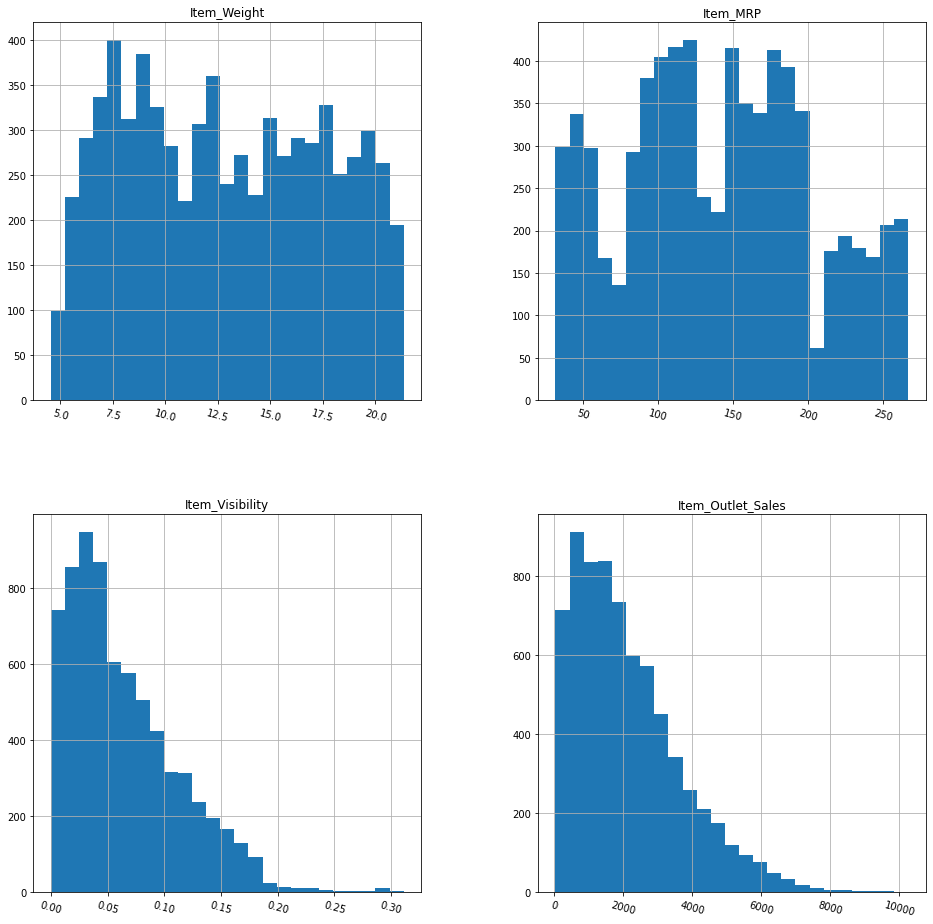

In [ ]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [ ]:
X = df.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Visibility']].values
X.shape

(7060, 3)

In [ ]:
# target vector
y = df.loc[:, 'Item_Outlet_Sales'].values

y.shape

(7060,)

In [ ]:
#instantiate the model
reg = LinearRegression(fit_intercept=True)

In [ ]:
#fit the model
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict(X[0].reshape(-1,3))

array([3901.89276486])

In [ ]:
#how close our model is to real numbers
score = reg.score(X, y)
#R squared score
print(score)

0.39226185385301704
